In [88]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

db_filename='dinofunworld.db'
conn= sqlite3.connect(db_filename)
c= conn.cursor()

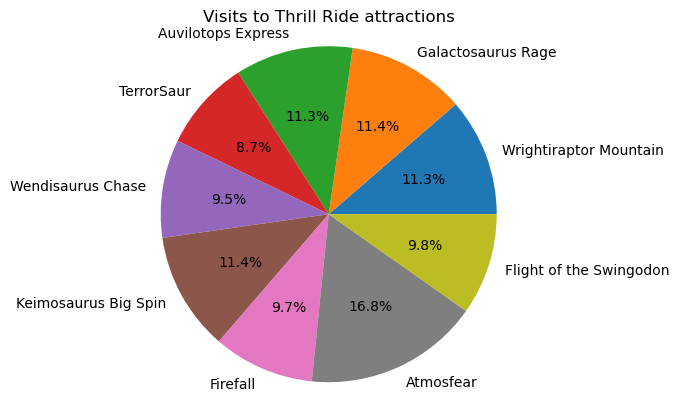

[['Wrightiraptor Mountain', 18700], ['Galactosaurus Rage', 18717], ['Auvilotops Express', 18694], ['TerrorSaur', 14415], ['Wendisaurus Chase', 15577], ['Keimosaurus Big Spin', 18792], ['Firefall', 16024], ['Atmosfear', 27747], ['Flight of the Swingodon', 16093]]


In [89]:
c.execute("SELECT AttractionID, Name FROM attraction WHERE Category ='Thrill Rides\r'")
m=c.fetchall()

#print(m)

c.execute("SELECT attraction, COUNT(attraction) FROM checkin WHERE attraction BETWEEN 1 AND 8 OR attraction = 81 GROUP BY attraction ORDER BY attraction")
b=c.fetchall()
#print(b)

myList=[]

for x in range(len(m)):
    mL=[]
    mL.append(m[x][1])
    mL.append(b[x][1])
    myList.append(mL)

#print(myList)

manuStats= pd.DataFrame.from_records(myList, columns=['attraction','visits'])

plt.pie(manuStats['visits'], labels=manuStats['attraction'],shadow=False, autopct='%1.1f%%')
plt.title("Visits to Thrill Ride attractions")
plt.axis('equal')
plt.show()
print(myList)

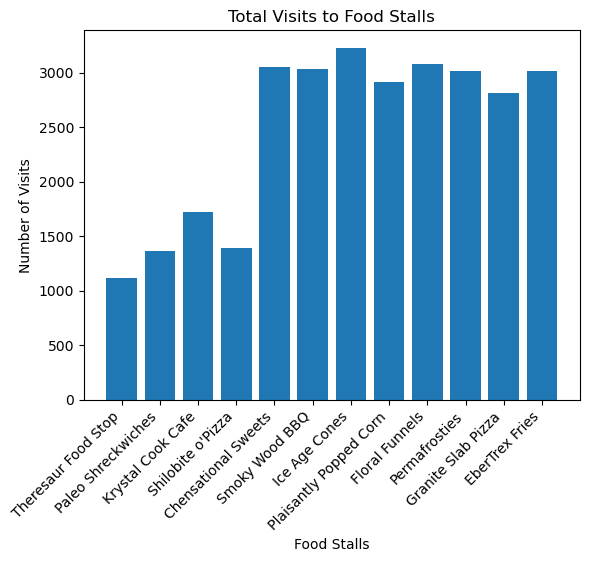

[['Theresaur Food Stop', 1116], ['Paleo Shreckwiches', 1361], ['Krystal Cook Cafe', 1725], ["Shilobite o'Pizza", 1393], ['Chensational Sweets', 3049], ['Smoky Wood BBQ', 3037], ['Ice Age Cones', 3228], ['Plaisantly Popped Corn', 2914], ['Floral Funnels', 3083], ['Permafrosties', 3018], ['Granite Slab Pizza', 2810], ['EberTrex Fries', 3018]]


In [90]:
c.execute("SELECT AttractionID, Name FROM attraction WHERE Category= 'Food\r'")
m=c.fetchall()
#print(m)

c.execute("SELECT attraction, COUNT(attraction) FROM checkin WHERE attraction BETWEEN 35 AND 39 OR attraction BETWEEN 53 AND 59 GROUP BY attraction ORDER BY attraction")
b=c.fetchall()
#print(b)

myList=[]

for x in range(len(m)):
    mL=[]
    mL.append(m[x][1])
    mL.append(b[x][1])
    myList.append(mL)

#print(myList)

barPlot = pd.DataFrame.from_records(myList,columns=['Food','Visits'])
plt.bar(barPlot['Food'],barPlot['Visits'])
plt.xlabel('Food Stalls')
plt.ylabel('Number of Visits')
plt.title('Total Visits to Food Stalls')
plt.xticks(barPlot['Food'], rotation=45, horizontalalignment='right')
plt.show()
print(myList)

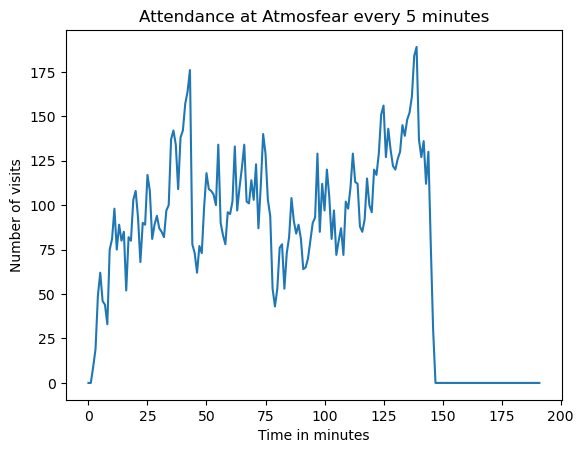

[[0, 0], [1, 0], [2, 9], [3, 19], [4, 49], [5, 62], [6, 46], [7, 44], [8, 33], [9, 75], [10, 81], [11, 98], [12, 75], [13, 89], [14, 80], [15, 85], [16, 52], [17, 82], [18, 80], [19, 103], [20, 108], [21, 93], [22, 68], [23, 90], [24, 89], [25, 117], [26, 108], [27, 81], [28, 89], [29, 94], [30, 87], [31, 85], [32, 82], [33, 97], [34, 100], [35, 137], [36, 142], [37, 134], [38, 109], [39, 138], [40, 142], [41, 157], [42, 164], [43, 176], [44, 78], [45, 73], [46, 62], [47, 77], [48, 73], [49, 99], [50, 118], [51, 109], [52, 108], [53, 106], [54, 100], [55, 134], [56, 90], [57, 83], [58, 78], [59, 96], [60, 95], [61, 102], [62, 133], [63, 97], [64, 110], [65, 121], [66, 134], [67, 102], [68, 101], [69, 114], [70, 103], [71, 123], [72, 87], [73, 111], [74, 140], [75, 129], [76, 103], [77, 94], [78, 53], [79, 43], [80, 53], [81, 76], [82, 78], [83, 53], [84, 73], [85, 82], [86, 104], [87, 91], [88, 84], [89, 89], [90, 81], [91, 64], [92, 65], [93, 70], [94, 80], [95, 90], [96, 93], [97, 12

In [91]:
c.execute("SELECT AttractionID FROM attraction WHERE Name='Atmosfear'")
n=c.fetchall()
#print(n)  #Attraction ID= 8

c.execute("SELECT visitorID, sequence FROM sequences")
m=c.fetchall()
#print(m)

tList=[]

for x in range(192):
    tL=[]
    tL.append(x)
    tL.append(0)
    tList.append(tL)
#print(tList)

for x in range(len(m)):
    #print(m[x][1])
    tFive= m[x][1].split("-")
    for x in range(192):
        if tFive[x]=='8':
            tList[x][1]=tList[x][1]+1     
#print(tList)

linePlot = pd.DataFrame.from_records(tList,columns=['Time','Visits'])
plt.plot(linePlot['Time'], linePlot['Visits'])
plt.xlabel('Time in minutes')
plt.ylabel('Number of visits')
plt.title('Attendance at Atmosfear every 5 minutes')
plt.show()
print(tList)

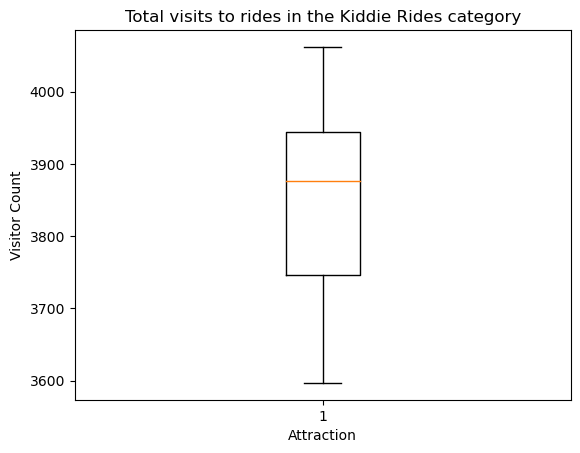

[3597, 3759, 4062, 3640, 3747, 3963, 3747, 3925, 3922, 4022, 3877]


In [92]:
### TEST FUNCTION: test_question4
# DO NOT REMOVE OR MODIFY THE ABOVE LINE
# your code here
c.execute("SELECT AttractionID, Name FROM attraction WHERE Category= 'Kiddie Rides\r'")
m=c.fetchall()
#print(m)

c.execute("SELECT attraction, COUNT(attraction) FROM checkin WHERE attraction BETWEEN 9 AND 19 GROUP BY attraction ORDER BY attraction")
b=c.fetchall()
#print(b)

visits= [x[1] for x in b]
#print(visits)

myList=[]

for x in range(len(m)):
    mL=[]
    mL.append(m[x][1])
    mL.append(b[x][1])
    myList.append(mL)


boxPlot=pd.DataFrame.from_records(myList,columns=['Attraction', 'Visits'])
plt.boxplot(visits)
plt.xlabel('Attraction')
plt.ylabel('Visitor Count')
plt.title('Total visits to rides in the Kiddie Rides category')
plt.show()
print(visits)